In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r'/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data_updated.csv')

# Null Hypothesis: There is no significant correlation between fuel efficiency (as measured by Fuel Consumption) and vehicle price within the dataset. 
# Alternative Hypothesis: There is a significant correlation between fuel efficiency and vehicle price within the dataset, suggesting that fuel efficiency influences vehicle pricing.


# Cleaning Data 

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Brand', 'Year', 'Title', 'Used/New',
       'Transmission', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometers', 'Location', 'Engine', 'BodyType', 'Price', 'N_Doors',
       'ColorsExt', 'FuelCategory', 'N_Seats', 'City', 'State', 'State_New',
       'Average_Price', 'Average_Price_City'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Brand                 0
Year                  0
Title                 0
Used/New              0
Transmission          0
DriveType             0
FuelType              0
FuelConsumption       0
Kilometers            0
Location              0
Engine                0
BodyType              0
Price                 0
N_Doors               0
ColorsExt             0
FuelCategory          0
N_Seats               0
City                  0
State                 0
State_New             0
Average_Price         0
Average_Price_City    0
dtype: int64

In [6]:
#dropping unnecessary columns 
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Unnamed: 0.1'])

In [7]:
df.columns

Index(['Brand', 'Year', 'Title', 'Used/New', 'Transmission', 'DriveType',
       'FuelType', 'FuelConsumption', 'Kilometers', 'Location', 'Engine',
       'BodyType', 'Price', 'N_Doors', 'ColorsExt', 'FuelCategory', 'N_Seats',
       'City', 'State', 'State_New', 'Average_Price', 'Average_Price_City'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11491 entries, 0 to 11490
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               11491 non-null  object 
 1   Year                11491 non-null  int64  
 2   Title               11491 non-null  object 
 3   Used/New            11491 non-null  object 
 4   Transmission        11491 non-null  object 
 5   DriveType           11491 non-null  object 
 6   FuelType            11491 non-null  object 
 7   FuelConsumption     11491 non-null  float64
 8   Kilometers          11491 non-null  float64
 9   Location            11491 non-null  object 
 10  Engine              11491 non-null  object 
 11  BodyType            11491 non-null  object 
 12  Price               11491 non-null  float64
 13  N_Doors             11491 non-null  int64  
 14  ColorsExt           11491 non-null  object 
 15  FuelCategory        11491 non-null  object 
 16  N_Se

In [9]:
df['FuelConsumption'].unique()

array([ 8.7,  6.7,  6.6,  6. ,  5.1,  7.1,  4.5,  9.8,  8. ,  5.6,  5.4,
        6.1,  8.4,  5.8,  4.7,  8.2,  6.9,  7.9,  6.2,  8.1,  4.2,  9.1,
        7.4,  7.6,  7.5,  9.9, 10.9,  7.8, 10. ,  6.4,  8.9,  9. ,  6.3,
       10.4,  7.2,  5.5,  5.9,  9.3,  7.3,  9.2,  4.8, 10.1,  8.3,  5.2,
        4.9,  8.8,  8.5, 10.3,  7. ,  6.5, 10.5,  6.8,  7.7,  4.6,  5.3,
        9.7, 10.6, 11.8, 10.2,  9.5,  9.4,  3.3,  5.7, 11.5, 11. ,  0. ,
       11.6, 10.7,  4.1,  3.6,  9.6,  8.6, 12.8, 13.3, 12.7, 13.6,  3.9,
        5. , 11.7, 12.6, 12.2,  4.4, 11.3, 13.8, 12. , 10.8,  3.8, 11.1,
        1.9, 13. ,  4. , 12.1, 11.9, 14.4, 11.2, 14.6, 15.4, 15.5, 13.2,
       12.4,  1.7, 16.8, 13.1, 15. , 12.3,  4.3, 12.9, 11.4, 15.3, 14.3,
       15.2,  3.5,  2.6, 14.2, 13.9,  2.4, 14. ,  2.5, 12.5,  3.4, 14.5,
       13.7, 15.1, 13.4, 14.8, 15.8])

In [10]:
df['FuelConsumption'].isnull().sum()

0

In [11]:
df_main = df.dropna()

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11491 entries, 0 to 11490
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               11491 non-null  object 
 1   Year                11491 non-null  int64  
 2   Title               11491 non-null  object 
 3   Used/New            11491 non-null  object 
 4   Transmission        11491 non-null  object 
 5   DriveType           11491 non-null  object 
 6   FuelType            11491 non-null  object 
 7   FuelConsumption     11491 non-null  float64
 8   Kilometers          11491 non-null  float64
 9   Location            11491 non-null  object 
 10  Engine              11491 non-null  object 
 11  BodyType            11491 non-null  object 
 12  Price               11491 non-null  float64
 13  N_Doors             11491 non-null  int64  
 14  ColorsExt           11491 non-null  object 
 15  FuelCategory        11491 non-null  object 
 16  N_Se

In [13]:
df_main['FuelConsumption'].unique()

array([ 8.7,  6.7,  6.6,  6. ,  5.1,  7.1,  4.5,  9.8,  8. ,  5.6,  5.4,
        6.1,  8.4,  5.8,  4.7,  8.2,  6.9,  7.9,  6.2,  8.1,  4.2,  9.1,
        7.4,  7.6,  7.5,  9.9, 10.9,  7.8, 10. ,  6.4,  8.9,  9. ,  6.3,
       10.4,  7.2,  5.5,  5.9,  9.3,  7.3,  9.2,  4.8, 10.1,  8.3,  5.2,
        4.9,  8.8,  8.5, 10.3,  7. ,  6.5, 10.5,  6.8,  7.7,  4.6,  5.3,
        9.7, 10.6, 11.8, 10.2,  9.5,  9.4,  3.3,  5.7, 11.5, 11. ,  0. ,
       11.6, 10.7,  4.1,  3.6,  9.6,  8.6, 12.8, 13.3, 12.7, 13.6,  3.9,
        5. , 11.7, 12.6, 12.2,  4.4, 11.3, 13.8, 12. , 10.8,  3.8, 11.1,
        1.9, 13. ,  4. , 12.1, 11.9, 14.4, 11.2, 14.6, 15.4, 15.5, 13.2,
       12.4,  1.7, 16.8, 13.1, 15. , 12.3,  4.3, 12.9, 11.4, 15.3, 14.3,
       15.2,  3.5,  2.6, 14.2, 13.9,  2.4, 14. ,  2.5, 12.5,  3.4, 14.5,
       13.7, 15.1, 13.4, 14.8, 15.8])

In [14]:
dups = df_main.duplicated()

In [15]:
dups.shape

(11491,)

In [16]:
df_main['Price'].mean()

39388.26802234148

In [17]:
df_main['Price'].median()

32950.0

In [18]:
df_main['Price'].max()

649880.0

# Find Extreme Values 

<Axes: xlabel='Price', ylabel='Count'>

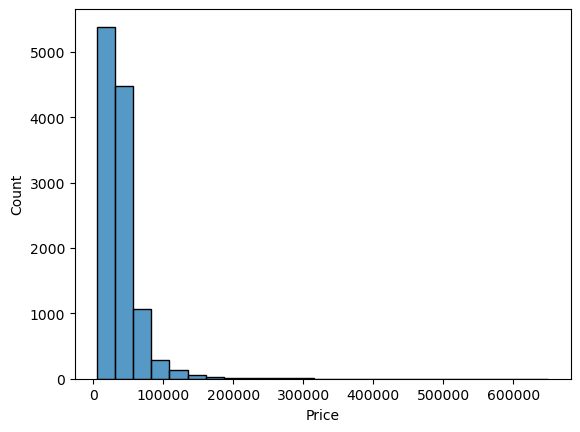

In [19]:
sns.histplot(df_main['Price'], bins=25) # Shows extreme values

# Data prep for regression analysis

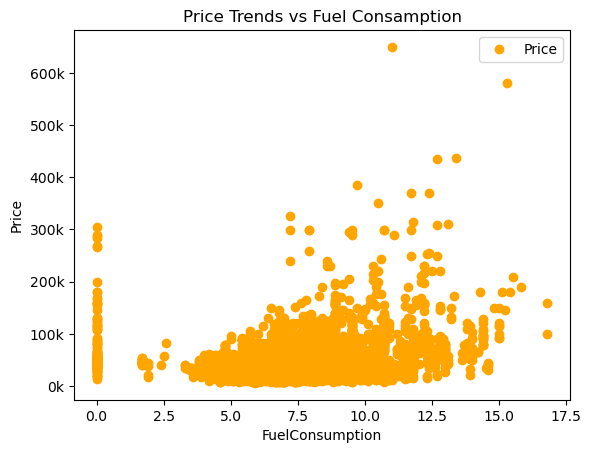

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_main.plot(x = 'FuelConsumption', y='Price',color='orange', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price Trends vs Fuel Consamption')  
plt.xlabel('FuelConsumption')  
plt.ylabel('Price')  

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_main['FuelConsumption'].values.reshape(-1,1)
Y = df_main['Price'].values.reshape(-1,1)

In [22]:
X

array([[8.7],
       [6.7],
       [6.6],
       ...,
       [6.2],
       [7.2],
       [7. ]])

In [23]:
Y

array([[ 51990.],
       [ 19990.],
       [108988.],
       ...,
       [ 35280.],
       [ 41888.],
       [ 65888.]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

Y_predicted = regression.predict(X_test)

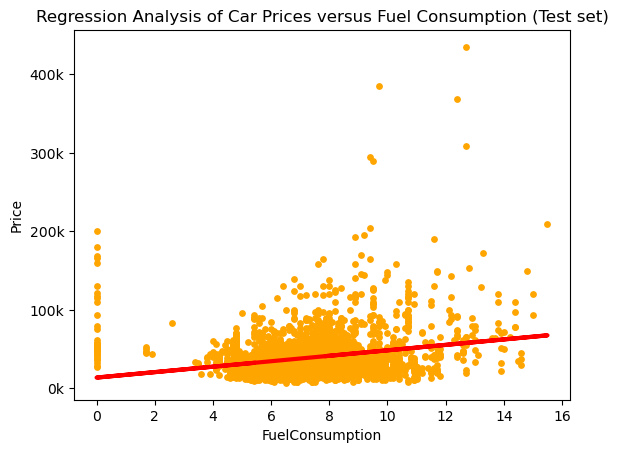

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, Y_test, color='orange', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =3)
plot_test.title('Regression Analysis of Car Prices versus Fuel Consumption (Test set)')
plot_test.xlabel('FuelConsumption')
plot_test.ylabel('Price')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plot_test.show()

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(Y_test, Y_predicted) # This is the mean squared error
r2 = r2_score(Y_test, Y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3472.18454048]]
Mean squared error:  691484595.4416755
R2 score:  0.03073838817234753


In [31]:
Y_predicted

array([[41119.5551162 ],
       [45633.39501883],
       [34522.40448929],
       ...,
       [39036.24439191],
       [35911.27830548],
       [32439.093765  ]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,37990.0,41119.555116
1,33990.0,45633.395019
2,26888.0,34522.404489
3,34888.0,39036.244392
4,41999.0,38689.025938
5,97990.0,40077.899754
6,38990.0,28272.472316
7,70990.0,39730.681300
8,26880.0,35564.059851
9,79990.0,58827.696273


# Compare how the regression fits the training set

In [33]:
# Predict.

Y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(Y_train, Y_predicted_train)
r2 = r2_score(Y_train, Y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3472.18454048]]
Mean squared error:  816392136.8145381
R2 score:  0.04693977461177956


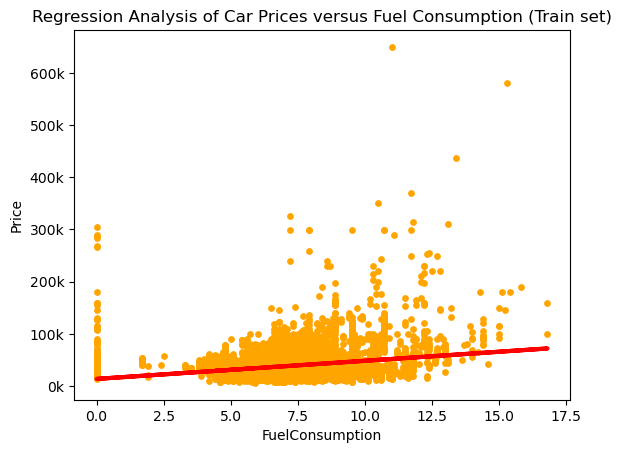

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, Y_train, color='orange', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Regression Analysis of Car Prices versus Fuel Consumption (Train set)')
plot_test.xlabel('FuelConsumption')
plot_test.ylabel('Price')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Fuel_trainset.png')
plot_test.show()

# Regression Analysis of Car Prices versus Fuel Consumption

In [37]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_main[df_main['Price']<=500000]

In [38]:
print(df_test.describe())


               Year  FuelConsumption     Kilometers          Price  \
count  11489.000000     11489.000000   11489.000000   11489.000000   
mean    2018.094438         7.433371   78629.441640   39288.085982   
std        2.850996         1.840168   61074.591223   27495.252390   
min     2013.000000         0.000000       1.000000    5990.000000   
25%     2016.000000         6.400000   32563.000000   23990.000000   
50%     2018.000000         7.400000   68096.000000   32950.000000   
75%     2020.000000         8.300000  111629.000000   45990.000000   
max     2023.000000        16.800000  419230.000000  436900.000000   

            N_Doors       N_Seats  Average_Price  Average_Price_City  
count  11489.000000  11489.000000   11489.000000        11489.000000  
mean       4.068326      4.858386   39388.119283        39357.743434  
std        0.598234      0.609851    1557.353217        13708.014981  
min        2.000000      2.000000   34368.986799         5990.000000  
25%        4.0

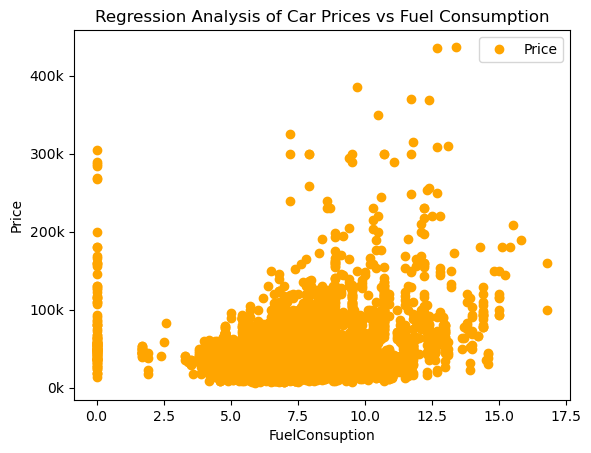

In [39]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'FuelConsumption', color='orange', y='Price', style='o')  
plt.title('Regression Analysis of Car Prices vs Fuel Consumption')  
plt.xlabel('FuelConsuption')  
plt.ylabel('Price')  

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.show()


In [40]:
# Reshape again.

X_2 = df_test['FuelConsumption'].values.reshape(-1,1)
Y_2 = df_test['Price'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, Y_train_2)

LinearRegression()

In [43]:
# Predict.

Y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(Y_test_2, Y_predicted_2)
r2 = r2_score(Y_test_2, Y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2942.82639214]]
Mean squared error:  854452165.4966202
R2 score:  0.04170232309174249


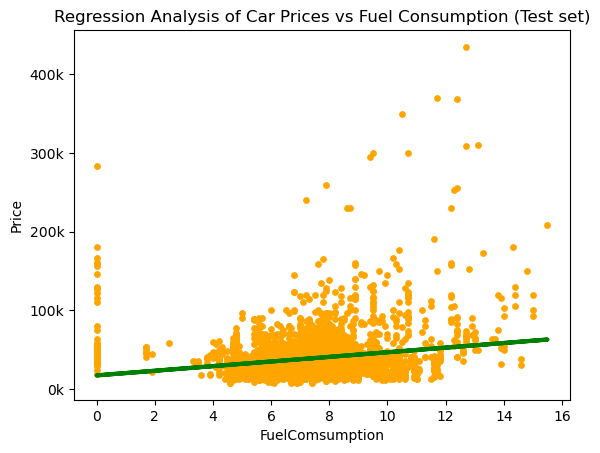

In [46]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, Y_test_2, color='orange', s = 15)
plot_test.plot(X_test_2, Y_predicted_2, color='Green', linewidth =3)
plot_test.title('Regression Analysis of Car Prices vs Fuel Consumption (Test set)')
plot_test.xlabel('FuelComsumption')
plot_test.ylabel('Price')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Fuel_test.png')
plot_test.show()

In [47]:
data = pd.DataFrame({'Actual': Y_test_2.flatten(), 'Predicted': Y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,22888.0,38849.380960
1,38071.0,34729.424011
2,33868.0,34435.141372
3,25987.0,31492.314980
4,41999.0,38260.815682
5,45989.0,37672.250403
6,87990.0,39732.228878
7,70990.0,39143.663599
8,42907.0,42380.772631
9,79990.0,55034.926117


# Analysis: the low R^2 scores in both cases imply the model's predictive power is limited, signaling potential for improvement.


# Null Hypothesis: There is no significant correlation between the car's price and kilometers.
# Alternative Hypothesis: There is a significant correlation between the car's price and kilometers.

# 1. Data Cleaning 

In [48]:
df_main['Kilometers'].isnull().sum()

0

# 3 Data prep for regression analysis

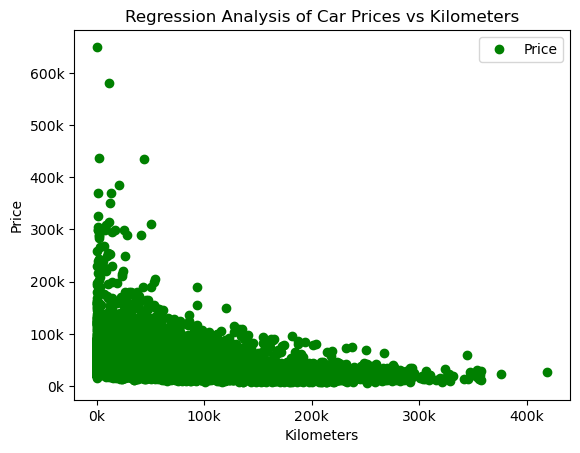

In [49]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Kilometers', y='Price', color='green', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Regression Analysis of Car Prices vs Kilometers')  
plt.xlabel('Kilometers')  
plt.ylabel('Price')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Fuel_1.png')
plt.show()

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Kilometers'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [51]:
X

array([[5.5950e+03],
       [1.6000e+01],
       [8.4720e+03],
       ...,
       [5.1650e+03],
       [8.5525e+04],
       [3.1852e+04]])

In [52]:
y

array([[ 51990.],
       [ 19990.],
       [108988.],
       ...,
       [ 35280.],
       [ 41888.],
       [ 65888.]])

In [53]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [54]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [55]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

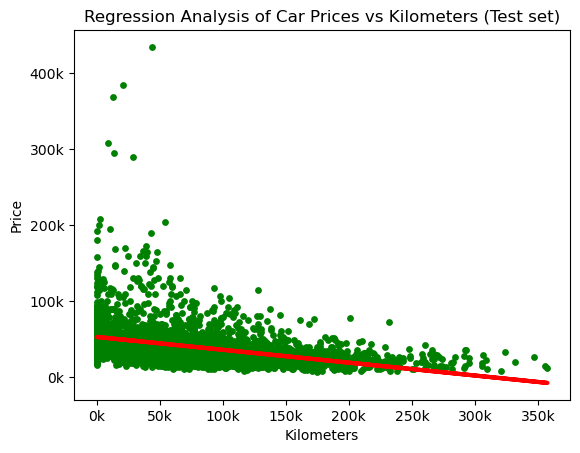

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Regression Analysis of Car Prices vs Kilometers (Test set)')
plot_test.xlabel('Kilometers')
plot_test.ylabel('Price')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Kilometers_test.png')

plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.16961192]]
Mean squared error:  616219412.4082564
R2 score:  0.13623842837914113


In [60]:
y_predicted

array([[49603.52379888],
       [20859.22234989],
       [39211.40154918],
       ...,
       [50566.74988434],
       [26985.604848  ],
       [47913.00180667]])

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,37990.0,49603.523799
1,33990.0,20859.222350
2,26888.0,39211.401549
3,34888.0,38503.271789
4,41999.0,37739.848544
5,97990.0,52647.548901
6,38990.0,37128.397577
7,70990.0,52562.742942
8,26880.0,36365.143944
9,79990.0,49605.728754


# Compare how the regression fit the training set

In [62]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.16961192]]
Mean squared error:  748272509.2377732
R2 score:  0.12646296534826962


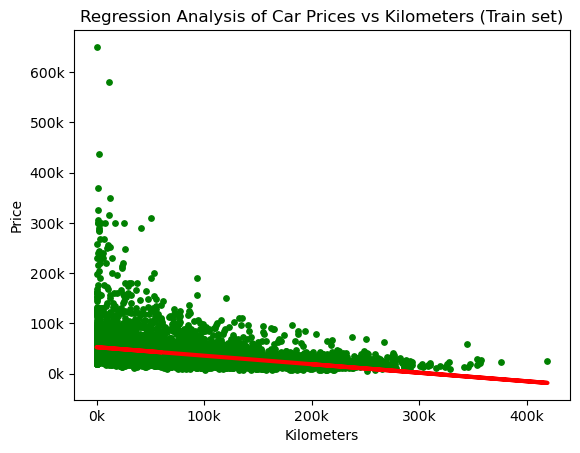

In [65]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Regression Analysis of Car Prices vs Kilometers (Train set)')
plot_test.xlabel('Kilometers')
plot_test.ylabel('Price')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Kilometers_train.png')

plot_test.show()

# Bonus: performance improvement after removing outliers

In [66]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_main[df_main['Price'] <=500000] 

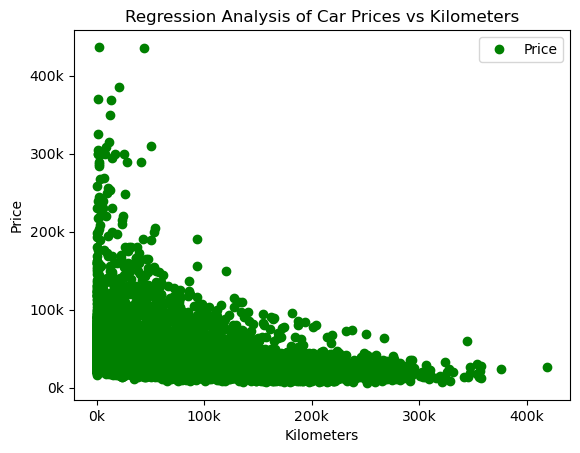

In [67]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Kilometers', y='Price', color='green', style='o')  
plt.title('Regression Analysis of Car Prices vs Kilometers')  
plt.xlabel('Kilometers')  
plt.ylabel('Price')  

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Kilometers.png')
plt.show()

In [68]:
# Reshape again.

X_2 = df_test['Kilometers'].values.reshape(-1,1)
y_2 = df_test['Price'].values.reshape(-1,1)

In [69]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [70]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [71]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.15999765]]
Mean squared error:  748272509.2377732
R2 score:  0.12646296534826962


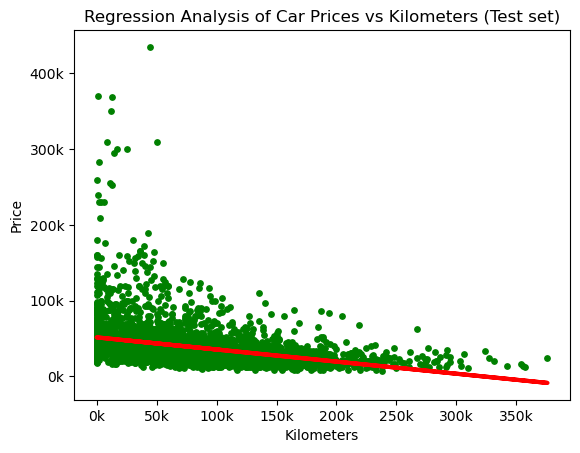

In [73]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='green', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Regression Analysis of Car Prices vs Kilometers (Test set)')
plot_test.xlabel('Kilometers')
plot_test.ylabel('Price')
# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Kilometers_test.png')

plot_test.show()

In [74]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,22888.0,35037.621258
1,38071.0,50866.508859
2,33868.0,49720.125690
3,25987.0,35403.695883
4,41999.0,37346.867354
5,45989.0,45600.186179
6,87990.0,48101.109460
7,70990.0,51329.542060
8,42907.0,47795.833942
9,79990.0,44750.438655


# The R^2 scores are low, with the training set at 13.62% and the test set slightly lower at 12.65%, showing the model explains only a small portion of the variance in prices. Overall, the model's predictive power is limited.


# Regression Analysis of Car Prices vs Production Year 

# Null Hypothesis: There is no significant correlation between the car's price and Production Year.
# Alternative Hypothesis: There is a significant correlation between the car's price and Production Year.

In [75]:
df_main['Year']

0        2022
1        2022
2        2022
3        2022
4        2017
         ... 
11486    2015
11487    2021
11488    2022
11489    2016
11490    2021
Name: Year, Length: 11491, dtype: int64

In [76]:
df_main['Year'].unique()

array([2022, 2017, 2013, 2014, 2018, 2016, 2023, 2015, 2019, 2021, 2020])

# Data prep for regression analysis

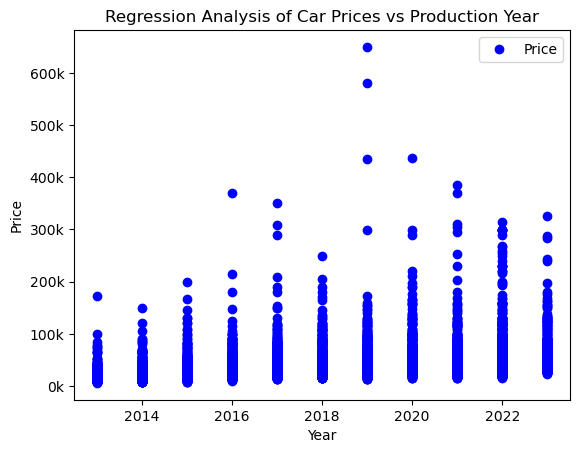

In [77]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='Price', color='blue', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Regression Analysis of Car Prices vs Production Year')  
plt.xlabel('Year')  
plt.ylabel('Price')  

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Set x-axis major locator to show every year
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Year.png')
plt.show()

In [78]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [79]:
X

array([[2022],
       [2022],
       [2022],
       ...,
       [2022],
       [2016],
       [2021]])

In [80]:
y

array([[ 51990.],
       [ 19990.],
       [108988.],
       ...,
       [ 35280.],
       [ 41888.],
       [ 65888.]])

In [81]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis¶

In [82]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [83]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [84]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

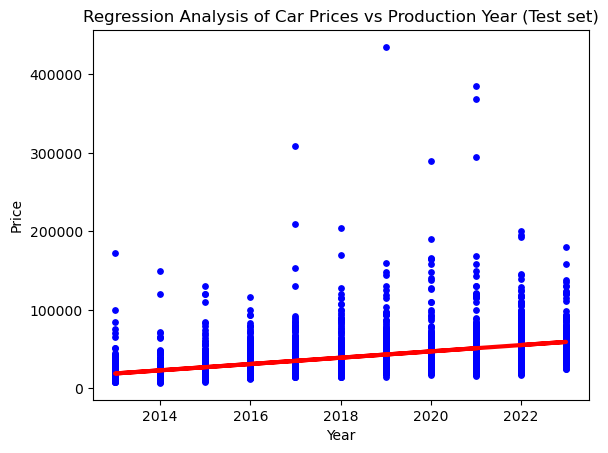

In [85]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Regression Analysis of Car Prices vs Production Year (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Price')
plot_test.show()

In [86]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [87]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4023.26621683]]
Mean squared error:  599502990.5657418
R2 score:  0.15967002191842672


In [88]:
y_predicted

array([[51091.81324563],
       [26952.21594465],
       [43045.28081197],
       ...,
       [55115.07946246],
       [22928.94972782],
       [55115.07946246]])

In [89]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,37990.0,51091.813246
1,33990.0,26952.215945
2,26888.0,43045.280812
3,34888.0,47068.547029
4,41999.0,39022.014595
5,97990.0,55115.079462
6,38990.0,39022.014595
7,70990.0,59138.345679
8,26880.0,18905.683511
9,79990.0,47068.547029


In [90]:
# Compare how the regression fits the training set

In [91]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [92]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [93]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4023.26621683]]
Mean squared error:  725056190.5790312
R2 score:  0.15356581077733078


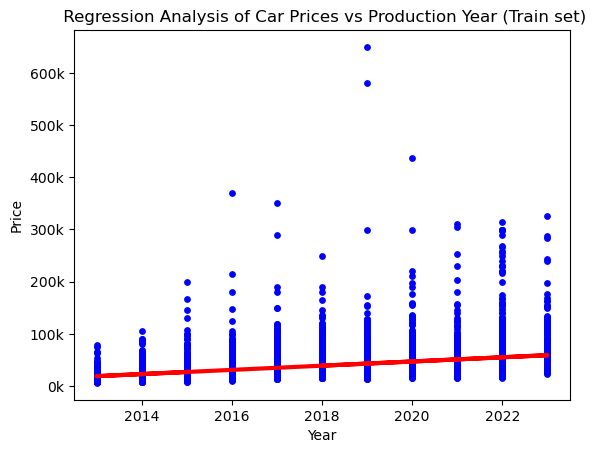

In [94]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title(' Regression Analysis of Car Prices vs Production Year (Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('Price')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Set x-axis major locator to show every year
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Year_train.png')
plot_test.show()

# Bonus: performance improvement after removing outliers

In [95]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_main[df_main['Price'] <=400000] 

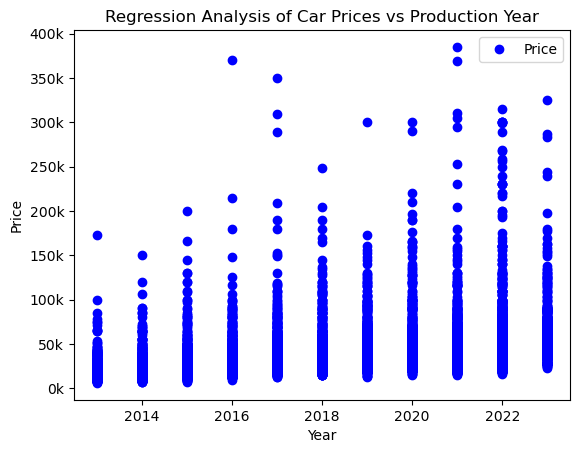

In [96]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Year', y='Price', color='blue', style='o')  
plt.title('Regression Analysis of Car Prices vs Production Year')  
plt.xlabel('Year')  
plt.ylabel('Price')  

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Year_noOUTliers.png')
plt.show()

In [97]:
# Reshape again.

X_2 = df_test['Year'].values.reshape(-1,1)
y_2 = df_test['Price'].values.reshape(-1,1)

In [98]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [99]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [100]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [101]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [102]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3853.41302386]]
Mean squared error:  739550509.9188467
R2 score:  0.15225020752037677


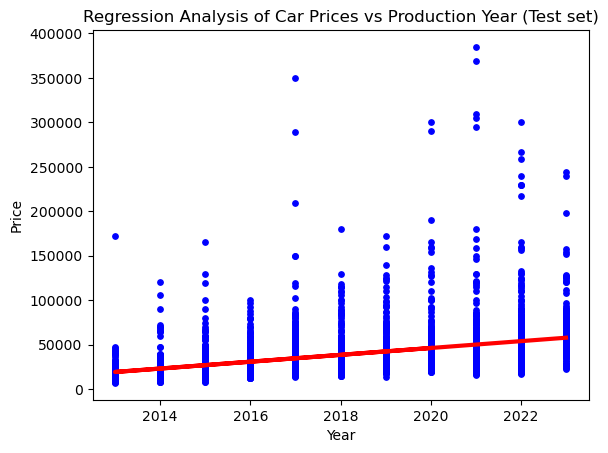

In [103]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='blue', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Regression Analysis of Car Prices vs Production Year (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Price')
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Year_test.png')
plot_test.show()

In [104]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,57885.0,46274.159652
1,19980.0,27007.094533
2,56990.0,46274.159652
3,26990.0,30860.507556
4,46085.0,53980.985700
5,28990.0,30860.507556
6,52999.0,53980.985700
7,21990.0,23153.681509
8,41990.0,34713.920580
9,21990.0,27007.094533


In [105]:
# Regression Used/New cars 

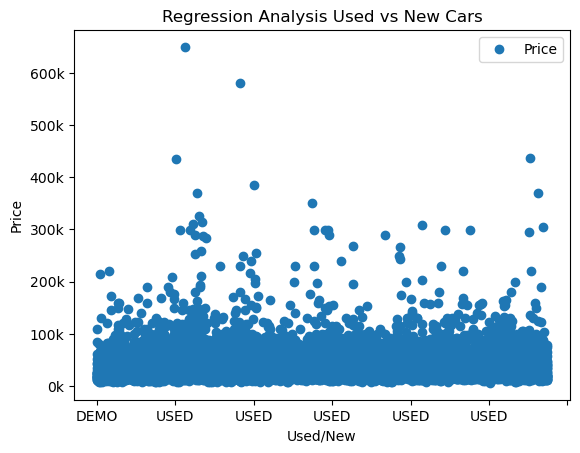

In [106]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Used/New', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Regression Analysis Used vs New Cars')  
plt.xlabel('Used/New')  
plt.ylabel('Price') 
# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Regre_Prices_vs_Year_noOUTliers.png')
